## Acknowledgment

* Doing this homework including 2NN and CNN, I discussed with several classmates: 유지상, 이다예, 이세라, 임상수, and 최광호, and they are all from the GSDS.



## Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
"""
Change directory to where this file is located
"""
#%cd 'COPY&PASTE FILE DIRECTORY HERE'
%cd "/content/drive/MyDrive/GSDS/2022-1/MLDL1/DL/homework3"

/content/drive/MyDrive/GSDS/2022-1/MLDL1/DL/homework3


## Import Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

## K-Nearest Neighbor Implementation

In [ ]:
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """
        Train the classifier using the given training data (X, y).
        Recall that for k-nearest neighbors this is just memorizing the training data.

        Do NOT Modify this method.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        self.X_train = X
        self.y_train = y

    def inference(self, X_test, k=1, dist_metric='dot'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels. 

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
            but you will need to implement 'l2' for question (b).
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred

    def compute_distance(self, X_test, dist_metric='l2'):
        """
        Computes the distance between the training data and test data, 
        using dot-product similarity or Euclidean (L2) distance as the distance metric.

        Question (a)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot': 
            # your code
            dists = (-1) * X_test.dot(self.X_train.T)

        elif dist_metric=='cos':
            # your code
            numerator = X_test.dot(self.X_train.T)
            
            norm_test = np.linalg.norm(X_test, axis=1)
            norm_train = np.linalg.norm(self.X_train, axis=1)
            denom = np.outer(norm_test, norm_train)
            
            dists = (-1) * (numerator / denom)

        elif dist_metric=='l2':    
            # your code
            dists = np.zeros((X_test.shape[0], self.X_train.shape[0]))
            for i in range(X_test.shape[0]):
                dists[i, :] = np.linalg.norm(X_test[i] - self.X_train, axis=1)

        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (b)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        # your code
        # distance matrix - ith row - jth col denotes the distance between ith element in test and jth element in training
        y_pred = np.zeros(shape=(X_test.shape[0], ))
        for i in range(X_test.shape[0]):
            dist_per_obs = dists[i, :]
            k_nearest_idx = dist_per_obs.argsort()[:k]
            k_nearest_label = self.y_train[k_nearest_idx]
            most_idx = np.argmax(np.unique(k_nearest_label, return_counts=True)[1])
            y_pred[i] = k_nearest_label[most_idx]

        return y_pred

    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.
        
        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading

In [ ]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False)
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [ ]:
num_train_data = 1000
num_test_data = 200

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when it is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data)
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data)

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [ ]:
model = KNN()
model.train(X_train, y_train)

In [ ]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.835


## Experiments

In [ ]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [ ]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k), end=' ')
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5     processing... k= 10     processing... k= 15     processing... k= 20     processing... k= 25     processing... k= 30     processing... k= 35     processing... k= 40     processing... k= 45     processing... k= 50 
running KNN with cos distance metric
    processing... k=  5     processing... k= 10     processing... k= 15     processing... k= 20     processing... k= 25     processing... k= 30     processing... k= 35     processing... k= 40     processing... k= 45     processing... k= 50 
running KNN with l2 distance metric
    processing... k=  5     processing... k= 10     processing... k= 15     processing... k= 20     processing... k= 25     processing... k= 30     processing... k= 35     processing... k= 40     processing... k= 45     processing... k= 50 


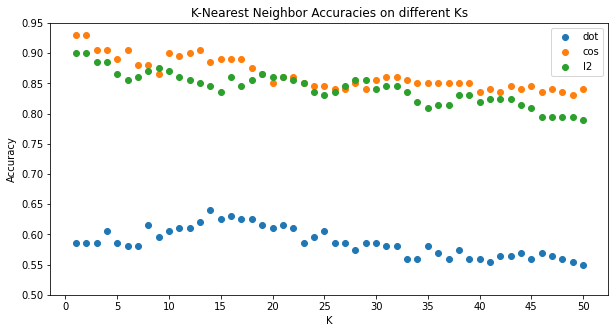

In [ ]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [ ]:
### 
# Question (c)
# Briefly report what you observe in the plot above.
###

# Brief report on Question (c)

* Among three metrics, the cosine similarity metric showed the best perforamnce in terms of accuracy, with the highest value being over 90\%, and it is true for almost every candidate of $k$.
    - The KNN using the dot product scores the best accuracy at the larger $k$ than the model using the other metrics, and I think this shows that the model is vulnerable to overfitting if $k$, the number of candidates to be compared, is too small.

* It is interesting that the performance of the model with cosine similarity metric is much better than that of the model with dot product metric, while the only difference between two metrics is that the cosine similarity normalizes the dot product by the norm of each input used in the dot product.
    - However I think that that difference is key to the difference in performance, since the cosine similarity only considers the direction of each vector in order to determine how similar the two points are.
    - While the dot product considers the size of each vector as well; as the difference in size between two vectors increases, so does the distance between them as well.

* Furthermore, as two points becomes more similar, the $L_2$ distance between them reduces, while the cosine similarity(and dot product) increases. This attributes to the relationship between two metrics, which can be proven as:
$$ 
\begin{align*}
{\vert \vert X-Y \vert \vert}^2 &= \langle X-Y, X-Y \rangle \\ 
&= \langle X, X-Y \rangle - \langle Y, X-Y \rangle \\
&= \langle X, X \rangle - \langle X, Y \rangle - \langle Y, X \rangle + \langle Y, Y \rangle \\
&= {\vert \vert X \vert \vert}^2 + {\vert \vert Y \vert \vert}^2 - 2 \langle X, Y \rangle
\end{align*}
$$
and this implies that the $L_2$ distance and the dot product has negative relationship since every $L_2$ norm term is non-negative.
    - To reflect this, I needed to change the sign of either dot product and cosine similarity or $L_2$ distance when making the distance matrix in the question (a).